### Chaper 11. KNN, K-means, 결정트리

## 02 예제: KNN을 이용한 붓꽃 분류

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
iris.data.shape

(150, 4)

In [7]:
# 4개의 특징 이름 출력(속성 이름)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [9]:
# 정수는 꽃의 종류를 나타냄 0 = setosa, 1 = versicolor, 2 = virginica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
# 속성의 이름
print("iris.feature_names: ", iris.feature_names)   

# y데이터의 이름
print("iris.target_names: ", iris.target_names)     

iris.feature_names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris.target_names:  ['setosa' 'versicolor' 'virginica']


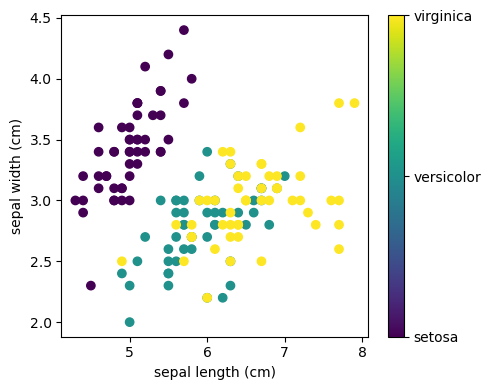

In [11]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

# 속성1: 꽃받침의 길이
x_index = 0

# 속성2: 꽃받침의 너비
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5,4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

### KNN으로 iris 분류하기

In [12]:
## train_test_split으로 데이터 분할
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# (80:20)으로 분할
# test_size 0.2 -> 20%만 테스트에 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [13]:
# k = 5로 설정
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# 학습단계(n_neighbors는 NN 알고리즘의 k값 결정)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 테스트 단계
y_pred = knn.predict(X_test)

# 예측값
y_pred.shape, y_pred

((30,),
 array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]))

In [14]:
# 정답
y_test

array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

In [15]:
## 정확도 계산

# (1) 정답수
y_pred == y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [16]:
# (2) 정확도(Accuracy): 정답 수의 평균
(y_pred == y_test).mean()

np.float64(0.9666666666666667)

In [17]:
# 정확도 점수(측정지표) 출력(skikit learn 함수 활용)
scores = metrics.accuracy_score(y_test, y_pred)     # Test 데이터에 대한 정확도
print("scores: ", scores)

scores:  0.9666666666666667


In [18]:
# 학습데이터에 대한 정확도
metrics.accuracy_score(y_train, knn.predict(X_train))

0.975

In [19]:
# matrix: 행렬, metrics: 측정지표

In [25]:
# 혼동 행렬
# 모델의 성능을 평가할 때 사용되는 표 
# 모델이 얼마나 정확하게 예측했는지, 어떤 종류의 오류를 범했는지 한눈에 보여줌
metrics.confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  0,  9]])

In [ ]:
"""
- 첫 번째 행 (실제 Class 0)

모델이 실제 Class 0인 데이터 16개를 모두 Class 0으로 정확하게 예측 (16)
Class 0인 데이터를 Class 1이나 Class 2로 잘못 예측한 경우는 전혀 없음 (0, 0)
-> 모델이 Class 0을 완벽하게 분류

- 두 번째 행 (실제 Class 1):
실제 Class 1인 데이터 4개를 Class 1로 정확하게 예측 (4)
실제 Class 1인 데이터 1개를 Class 2로 잘못 예측 (1)
-> 모델이 Class 1 데이터를 하나 잘못 예측

세 번째 행 (실제 Class 2):
실제 Class 2인 데이터 9개를 모두 Class 2로 정확하게 예측 (9)
Class 2인 데이터를 Class 0이나 Class 1로 잘못 예측한 경우는 전혀 없음. (0, 0)
-> 모델이 Class 2를 완벽하게 분류

Class 0과 Class 2를 매우 잘 분류하고 있고, 오류는 단 한 건뿐
"""


In [24]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.80      0.89         5
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.93      0.95        30
weighted avg       0.97      0.97      0.97        30



### 새로운 꽃 데이터로 예측하기

In [21]:
# y 데이터의 이름
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
X_train

array([[5.4, 3. , 4.5, 1.5],
       [4.6, 3.2, 1.4, 0.2],
       [6.7, 2.5, 5.8, 1.8],
       [4.9, 3. , 1.4, 0.2],
       [5. , 2.3, 3.3, 1. ],
       [6.7, 3.3, 5.7, 2.5],
       [7.2, 3.2, 6. , 1.8],
       [5.8, 2.6, 4. , 1.2],
       [6.7, 3.1, 4.7, 1.5],
       [5.1, 3.8, 1.6, 0.2],
       [7.7, 3. , 6.1, 2.3],
       [5. , 3.4, 1.5, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [5.4, 3.7, 1.5, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [4.3, 3. , 1.1, 0.1],
       [5.7, 4.4, 1.5, 0.4],
       [5.9, 3. , 4.2, 1.5],
       [6.1, 3. , 4.6, 1.4],
       [6.5, 3. , 5.5, 1.8],
       [5.2, 3.5, 1.5, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 2.6, 6.9, 2.3],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.9, 4.2, 1.3],
       [5. , 3.5, 1.6, 0.6],
       [5.6, 2.9, 3.6, 1.3],
       [6. , 2.2, 5. , 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.6, 3. , 4.1, 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.8, 3

In [22]:
import numpy as np

X = [[3, 4, 5, 2], [5, 4, 2, 2]]
X_new = np.array(X)
y_predict = knn.predict(X_new)
y_predict

array([1, 0])

In [23]:
# 1은 뭐고 0이 뭔지 모르니까 
iris.target_names[y_predict]

array(['versicolor', 'setosa'], dtype='<U10')